In [3]:
#Credit: https://towardsdatascience.com/mapping-geograph-data-in-python-610a963d2d7f
# https://catalog.data.gov/dataset/tiger-line-shapefile-2016-state-north-carolina-current-county-subdivision-state-based
#!pip install pyshp

  Stored in directory: C:\Users\yubin\AppData\Local\pip\Cache\wheels\a6\0c\de\321b5192ad416b328975a2f0385f72c64db4656501eba7cc1a
Successfully built pyshp


In [1]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))

In [3]:
shp_path = "./tl_2016_37_cousub/tl_2016_37_cousub.shp"
sf = shp.Reader(shp_path)

In [10]:
len(sf.shapes())
sf.records()[1]

Record #1: ['37', '073', '92092', '01026707', '3707392092', 'Mintonsville', 'Mintonsville township', '44', 'Z1', 'G4040', '', '', '', 'N', 90590966, 894572, '+36.3485581', '-076.6523555']

In [7]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [9]:
df = read_shapefile(sf)
df.shape
df.sample(5)


,STATEFP,COUNTYFP,COUSUBFP,COUSUBNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CNECTAFP,NECTAFP,NCTADVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,coords
180,37,067,90012,01026672,3706790012,Abbotts Creek,Abbotts Creek township,44,Z1,G4040,,,,N,69188320,99274,+36.0535507,-080.0782954,"[(-80.13172399999999, 36.053598), (-80.1314319..."
847,37,153,93116,01027099,3715393116,Steeles,Steeles township,44,Z1,G4040,,,,N,179557919,3460787,+35.1212353,-079.9088383,"[(-80.075676, 35.140682), (-80.075649, 35.1411..."
6,37,023,92952,01026466,3702392952,Silver Creek,Silver Creek township,44,Z1,G4040,,,,N,139719058,54932,+35.6737256,-081.8002033,"[(-81.869388, 35.719623999999996), (-81.86905,..."
714,37,031,92000,01026504,3703192000,Marshallberg,Marshallberg township,44,Z1,G4040,,,,N,3562554,5291125,+34.7303516,-076.5084082,"[(-76.528998, 34.735637), (-76.528707, 34.7362..."
767,37,067,90216,01026673,3706790216,Belews Creek,Belews Creek township,44,Z1,G4040,,,,N,81269267,2599971,+36.2086713,-080.0876493,"[(-80.145285, 36.258516), (-80.143242, 36.2584..."


In [74]:
df.to_csv('North Carolina Map.csv',sep=',', index=False)


In [14]:


def plot_shape(id, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

(-76.66102373395205, 36.33751112606341)

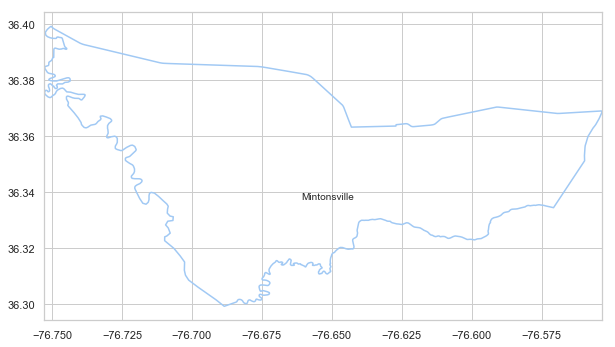

In [16]:

county = 'Mintonsville'
GEOID = df[df.NAME == county].index.get_values()[0]
plot_shape(GEOID, county)


In [17]:
sf.shape(GEOID)

In [37]:

def plot_map(sf, x_lim = None, y_lim = None, figsize = (16,6)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

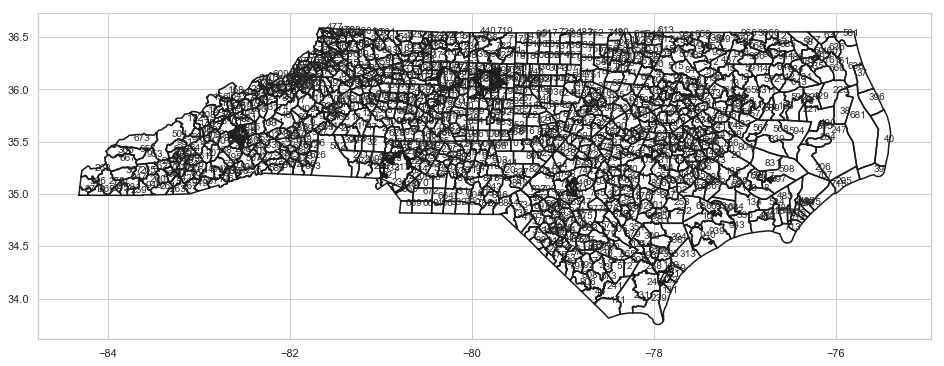

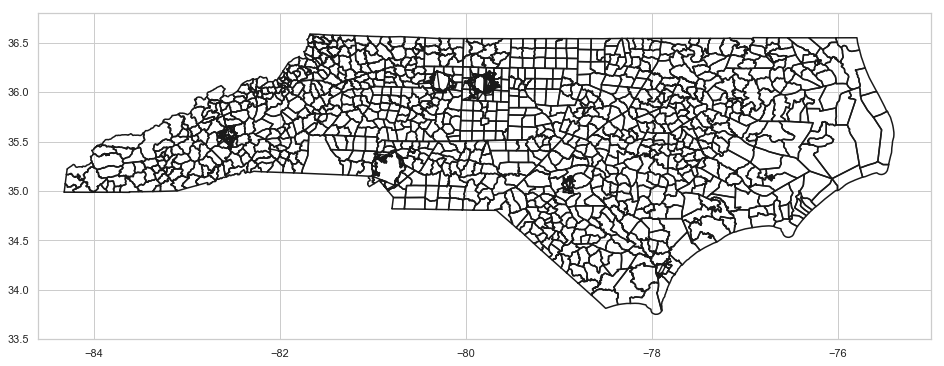

In [38]:

plot_map(sf)
y_lim = (33.5,36.8) # latitude 
x_lim = (-84.6, -75.0) # longitude
plot_map(sf, x_lim, y_lim)


In [35]:
def plot_map2(id, sf, x_lim = None, y_lim = None, figsize=(16,6)):
    '''
    Plot map with lim coordinates
    '''
   
    plt.figure(figsize = figsize)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat, 'r', linewidth=3) 
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        


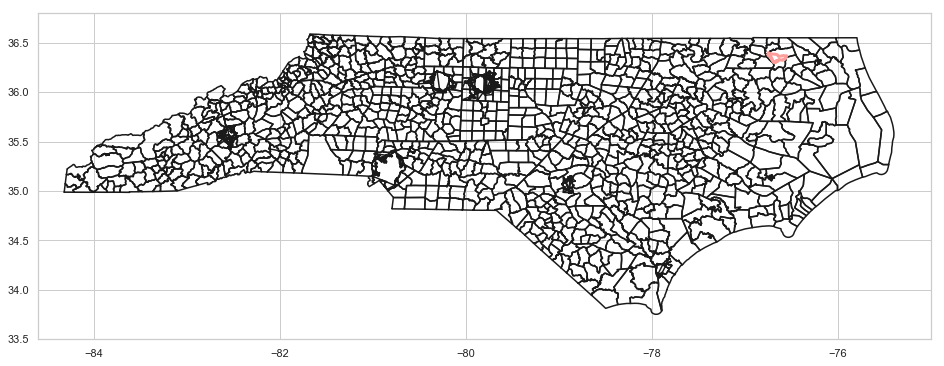

In [36]:
plot_map2(1, sf, x_lim, y_lim)

In [41]:
def plot_map_fill(id, sf, x_lim = None, 
                          y_lim = None, 
                          figsize = (16,6), 
                          color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
        
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    ax.fill(x_lon,y_lat, color)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)




<Figure size 1152x432 with 0 Axes>

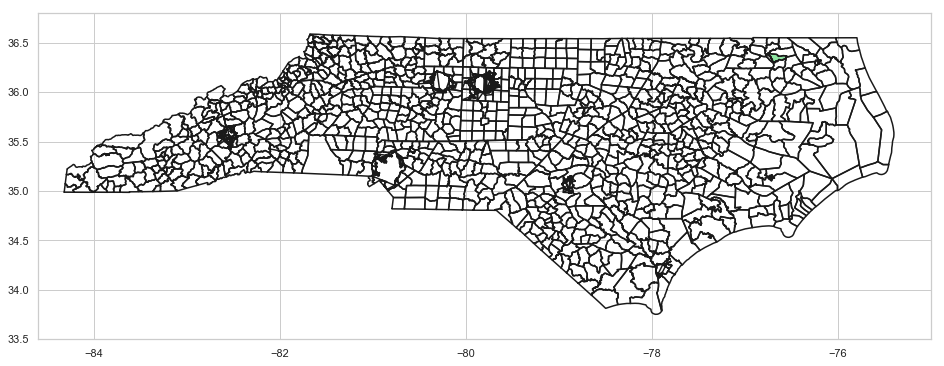

In [42]:
plot_map_fill(1, sf, x_lim, y_lim, color='g')

In [135]:
sf.shape(5)

In [102]:
def plot_map_fill_multiples_ids(title, county, sf, 
                                               x_lim = None, 
                                               y_lim = None, 
                                               figsize = (20,10), 
                                               color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in county:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color)
             
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)
        plt.text(x0, y0, id, fontsize=10)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
    
    plt.savefig('map.png')



<Figure size 1440x720 with 0 Axes>

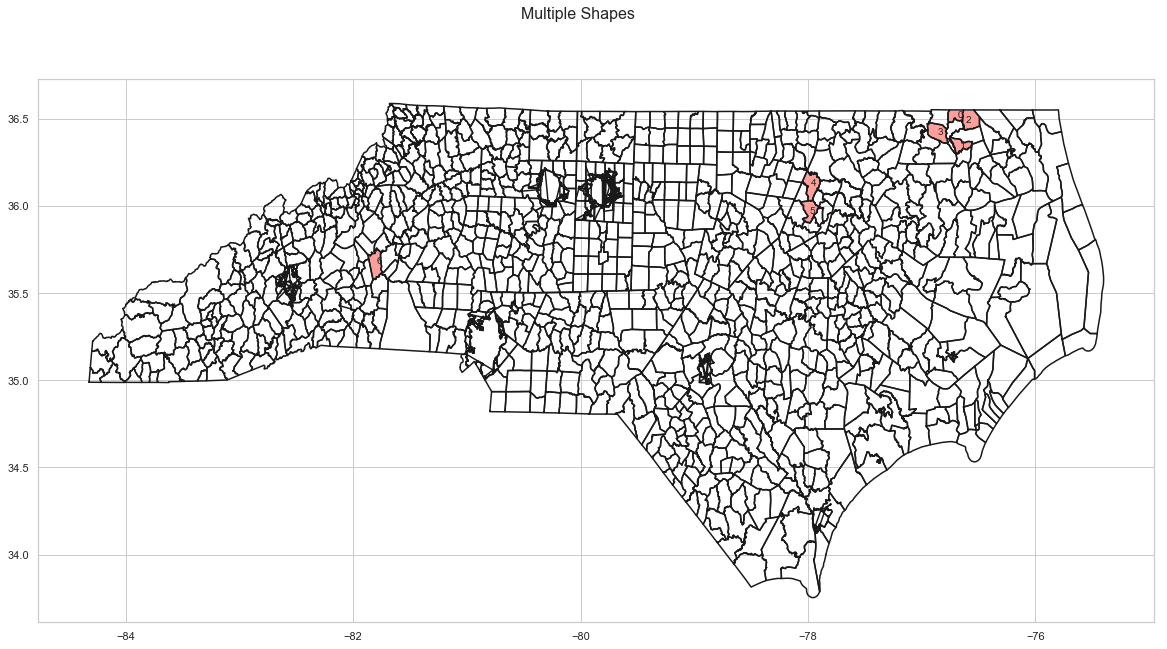

In [103]:
county_id = [0, 1, 2, 3, 4, 5, 6]
plot_map_fill_multiples_ids("Multiple Shapes", 
                            county_id, sf, color = 'r')

In [110]:
def plot_comunas_2(sf, title, district, color):
    '''
    Plot map with selected comunes, using specific color
    '''
    df = read_shapefile(sf)
    comuna_id = []
    for i in district:
        #print(i)
        if(df[df.NAME == i].empty==False):
            comuna_id.append(df[df.NAME == i].index.get_values()[0])
        else:
            print(i + " Not Fund")
    plot_map_fill_multiples_ids(title, comuna_id, sf, 
                                       x_lim = None, 
                                       y_lim = None, 
                                       figsize = (60,25), 
                                       color = color);

<Figure size 4320x1800 with 0 Axes>

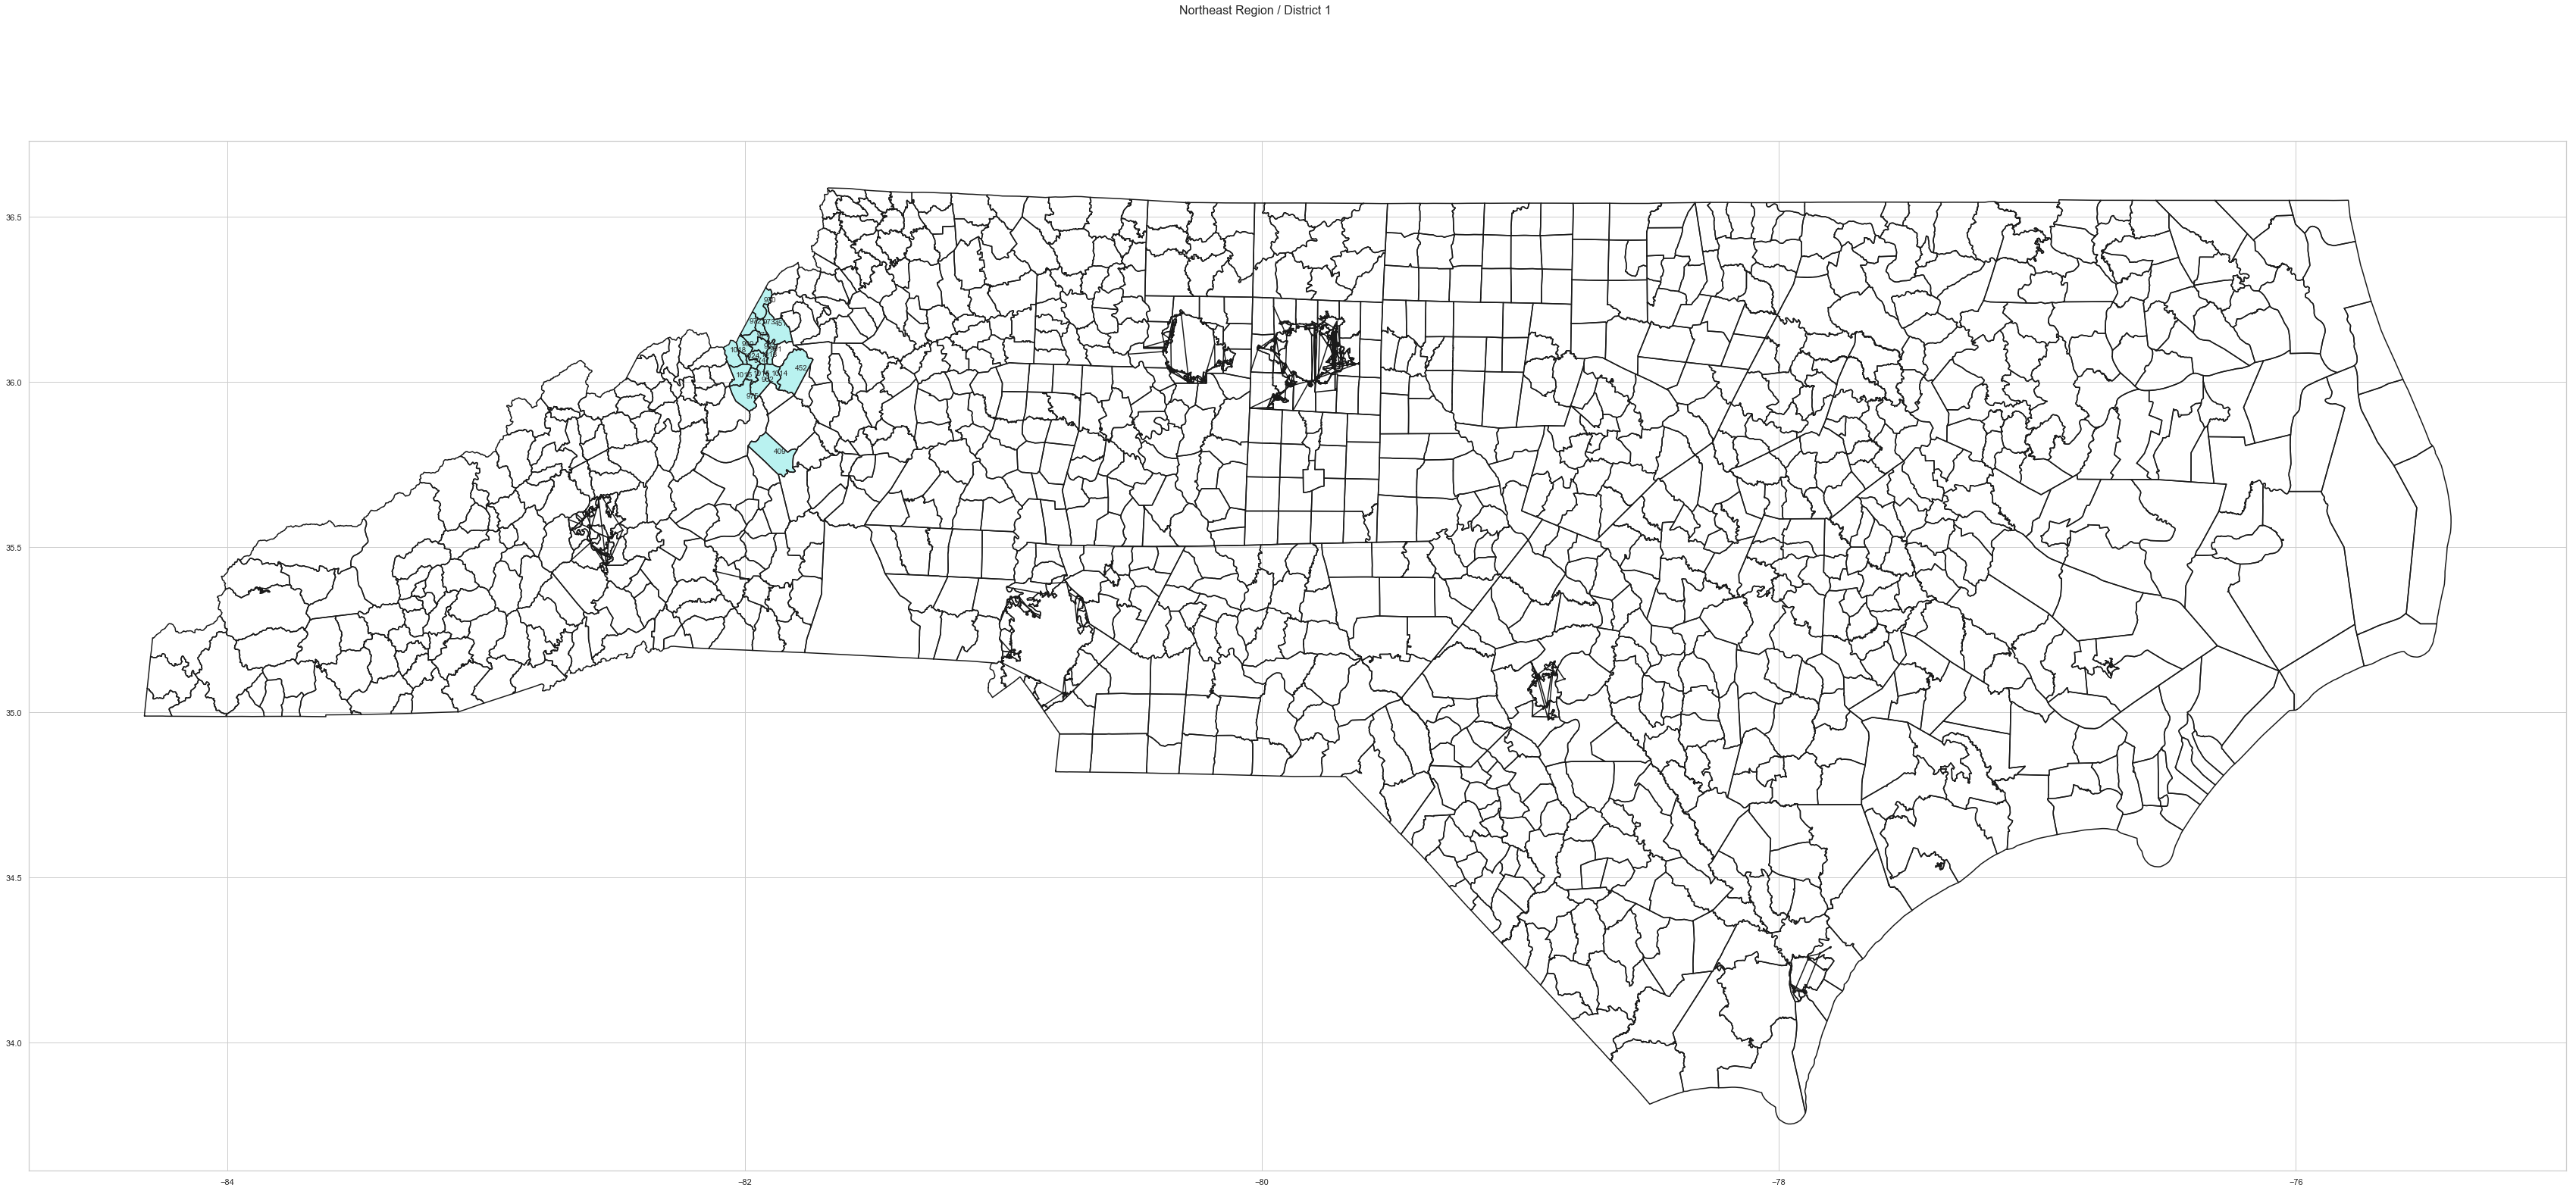

In [111]:
#District1 = ['Beaufort','Bertie','Camden','Chowan','Currituck','Dare','Gates','Halifax','Hertford','Hyde','Martin','Northampton','Pasquotank','Perquimans','Pitt','Roanoke Rapids','Tyrrell','Washington','Weldon']
county1 = df[df['COUNTYFP']=='011']['NAME']

plot_comunas_2(sf, 'Northeast Region / District 1 ', county1, 'c')


In [115]:
def calc_color(data, color=None):
        if color   == 1: 
            color_sq =['#dadaebFF','#bcbddcF0','#9e9ac8F0','#807dbaF0','#6a51a3F0','#54278fF0']; 
            colors = 'Purples';
        elif color == 2: 
            color_sq = ['#c7e9b4','#7fcdbb','#41b6c4','#1d91c0','#225ea8','#253494']; 
            colors = 'YlGnBu';
        elif color == 3: 
            color_sq = ['#f7f7f7','#d9d9d9','#bdbdbd','#969696','#636363','#252525']; 
            colors = 'Greys';
        elif color == 9: 
            color_sq = ['#ff0000','#ff0000','#ff0000','#ff0000','#ff0000','#ff0000']
        else:            
            color_sq = ['#ffffd4','#fee391','#fec44f','#fe9929','#d95f0e','#993404']; 
            colors = 'YlOrBr';
        new_data, bins = pd.qcut(data, 6, retbins=True,labels=list(range(6)))
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=6)
            sns.palplot(colors, 0.6);
            for i in range(6):
                print ("\n"+str(i+1)+': '+str(int(bins[i]))+
                       " => "+str(int(bins[i+1])-1), end =" ")
            print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins;

In [163]:
def plot_countys_data(sf, title, countys, data=None, 
                      color=None, print_id=False):
    '''
    Plot map with selected comunes, using specific color
    '''
    
    color_ton, bins = calc_color(data, color)
    df = read_shapefile(sf)
    county_id = []
    for i in countys:
        #i = conv_comuna(i).upper()
        county_id.append(df[df.NAME ==i].index.get_values()[0])
    plot_map_fill_multiples_ids_tone(sf, title, county_id, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (60,25));

In [164]:
def plot_map_fill_multiples_ids_tone(sf, title, county,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
        
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
        for id in df.index:
            shape_ex = sf.shape(id)
            x_lon = np.zeros((len(shape_ex.points),1))
            y_lat = np.zeros((len(shape_ex.points),1))
            for ip in range(len(shape_ex.points)):
                x_lon[ip] = shape_ex.points[ip][0]
                y_lat[ip] = shape_ex.points[ip][1]
                ax.fill(x_lon,y_lat, color_ton[county1.index(id)])
            if print_id != False:
                x0 = np.mean(x_lon)
                y0 = np.mean(y_lat)
                plt.text(x0, y0, id, fontsize=10)
        if (x_lim != None) & (y_lim != None):     
                plt.xlim(x_lim)
                plt.ylim(y_lim)


In [165]:
df[df['COUNTYFP']=='073']['NAME']

0           Haslett
1      Mintonsville
2       Holly Grove
3              Hall
384      Gatesville
385    Hunters Mill
386      Reynoldson
Name: NAME, dtype: object


1: 100 => 100 
2: 101 => 299 
3: 300 => 499 
4: 500 => 599 
5: 600 => 1999 
6: 2000 => 399999 

   1   2   3   4   5   6


TypeError: 'Int64Index' object is not callable

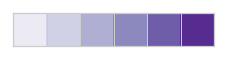

<Figure size 4320x1800 with 0 Axes>

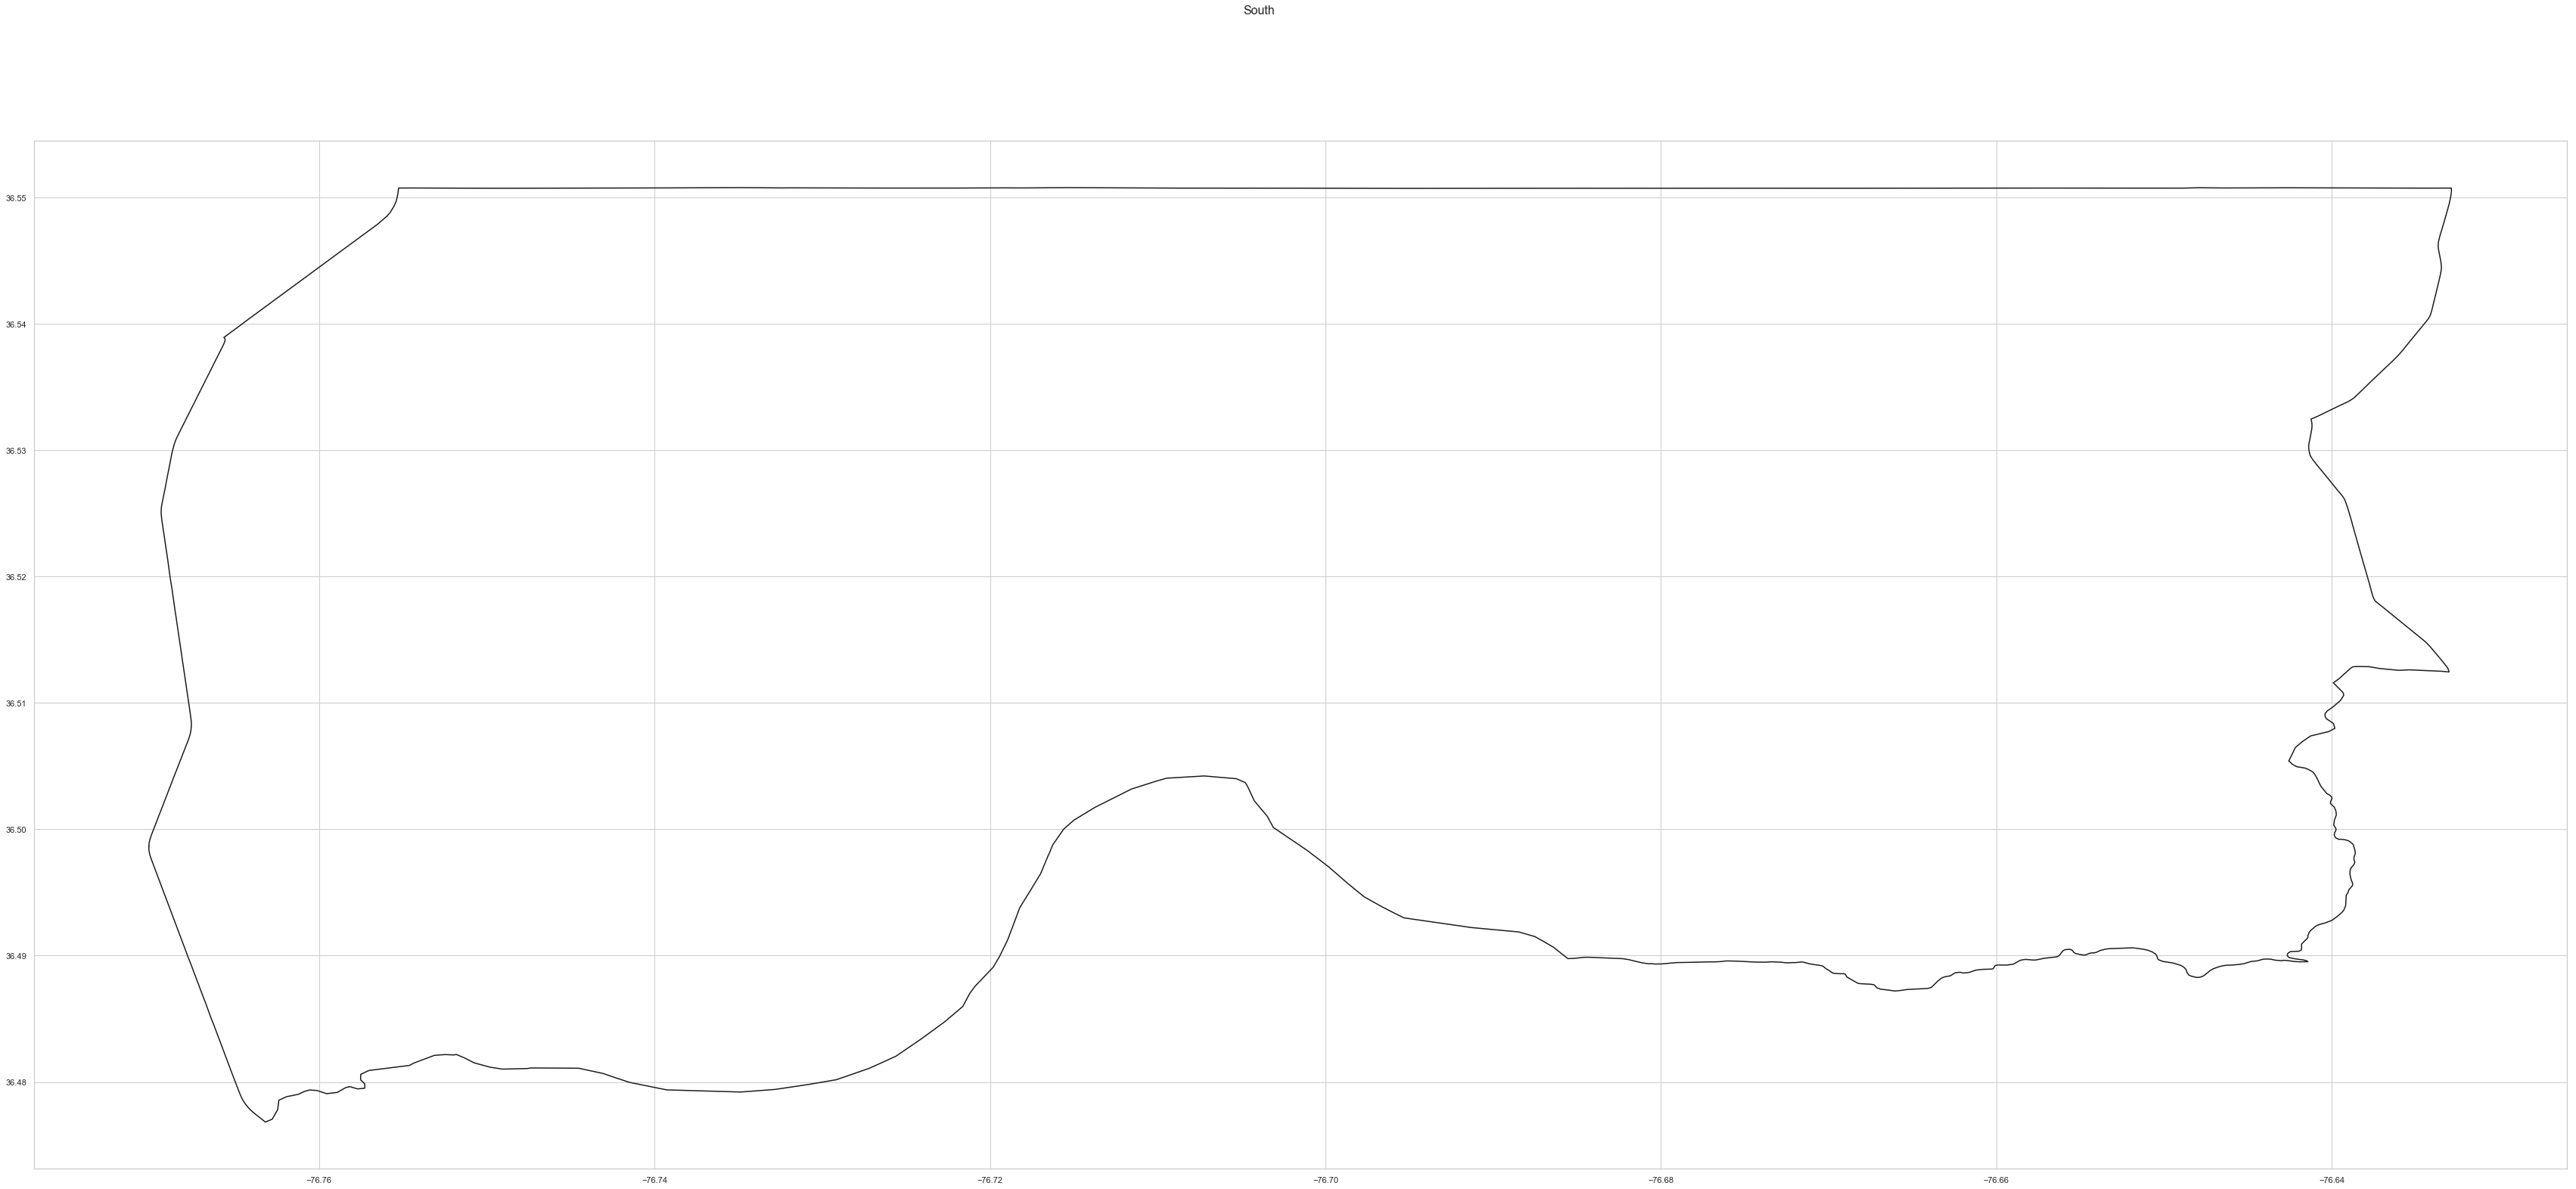

In [166]:
#south = ['alhué', 'calera de tango', 'buin', 'isla de maipo', 'el bosque', 'paine', 'la granja', 'pedro aguirre cerda', 'lo espejo', 'puente alto', 'san joaquín', 'san miguel', 'pirque', 'san bernardo', 'san ramón', 'la cisterna', 'talagante', 'la pintana']
county1 = df[df['COUNTYFP']=='073']['NAME']
data = [100, 2000, 300, 400000, 500, 600, 101]
print_id = True # The shape id will be printed
color_pallete = 1 # 'Purples'
plot_countys_data(sf, 'South', county1, data, color_pallete, print_id)

In [ ]:
census_17 = pd.read_excel('./data/CENSO_2017_COMUNAS_RM.xlsx')
census_17.shape

In [ ]:
title = 'Population Distrubution on Santiago Metropolitan Region'
data = census_17.PERSONAS
names = census_17.NOM_COMUNA
plot_comunas_data(sf, title, names, data, 4, True)

In [ ]:
title = 'Percentual of immigrants over total population'
data = census_17.INM_PERC
names = census_17.NOM_COMUNA
plot_comunas_data(sf, title, names, data, 2, True)

In [ ]:
shp_path = "./cb_2017_us_state_5m/cb_2017_us_state_5m.shp"
sf = shp.Reader(shp_path)
# Continental US
y_lim = (23, 50) # lat 
x_lim = (-128, -65) # long
state_id = [0, 10, 3, 5, 6, 7, 8, 30]
plot_map_fill_multiples_ids("US - States", state_id, sf, x_lim, 
                             y_lim, color = 'r', figsize = (15,9))